## Titanic Classification

### Import all the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape
test.shape

(418, 11)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.drop('PassengerId', inplace = True, axis = 1)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


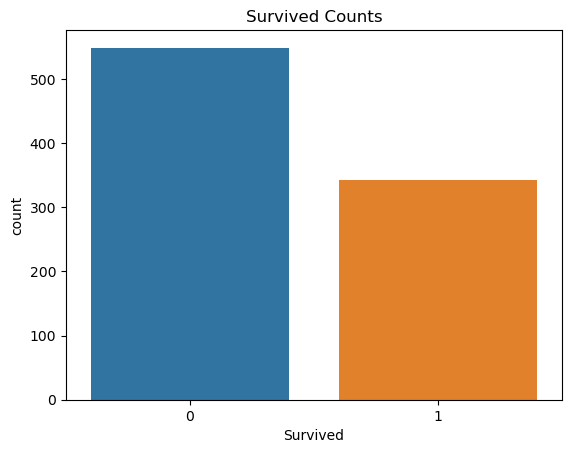

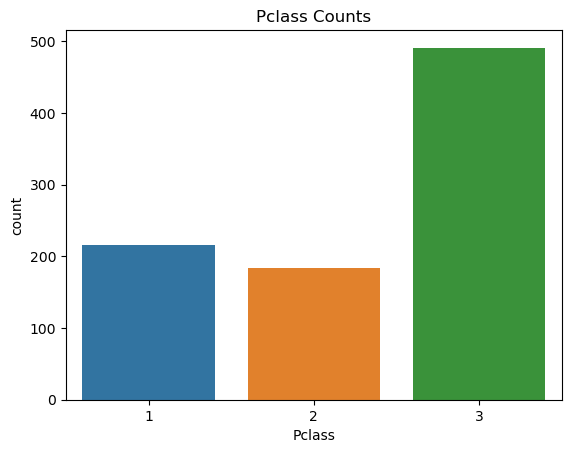

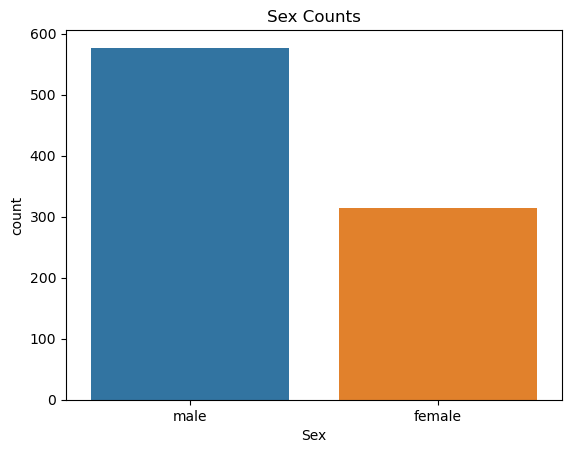

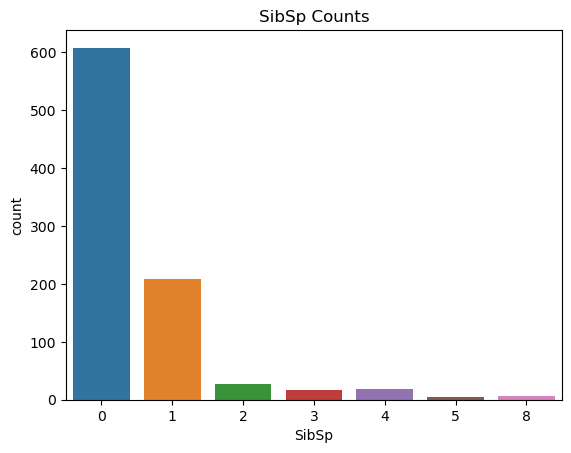

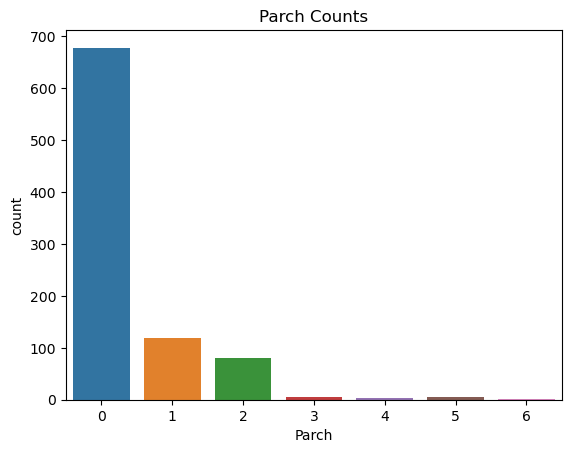

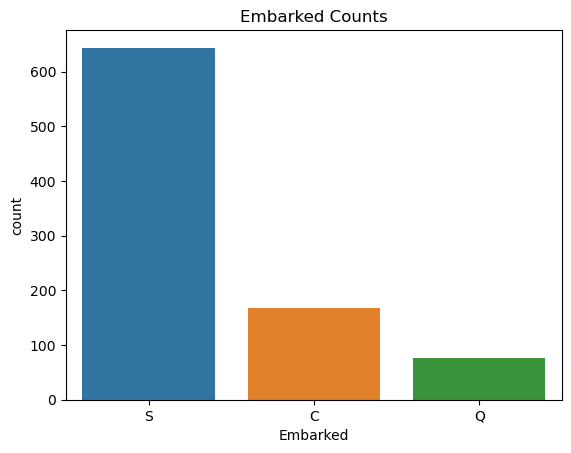

In [8]:
columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for i in columns:
    sns.countplot(data = train, x = i)
    plt.title(i + " Counts")
    plt.show()

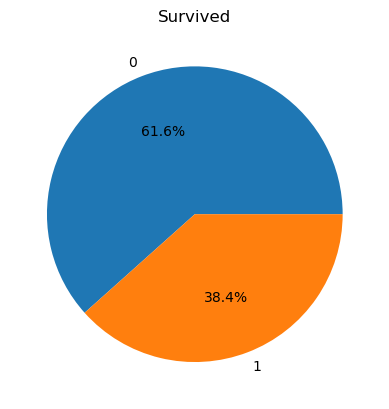

In [9]:
survived = train['Survived'].value_counts()
mylabels = [0, 1]
plt.pie(survived, labels = mylabels, autopct = '%1.1f%%')
plt.title('Survived')
plt.show()

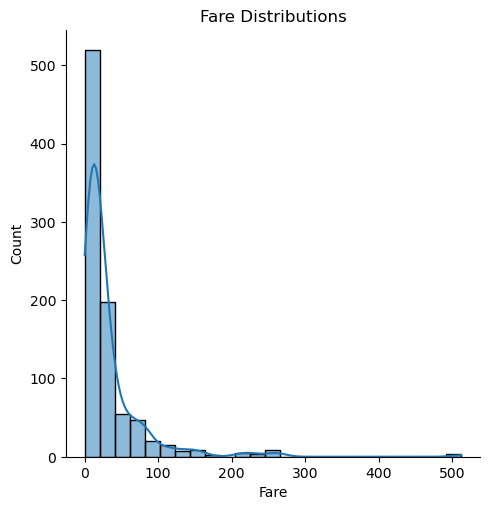

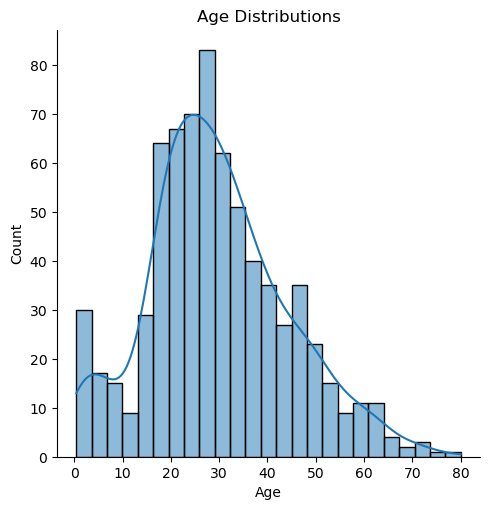

In [10]:
for i in ['Fare', 'Age']:
    sns.displot(data = train, x = i, kde=True, bins=25)
    plt.title(i + ' Distributions')
    plt.show()

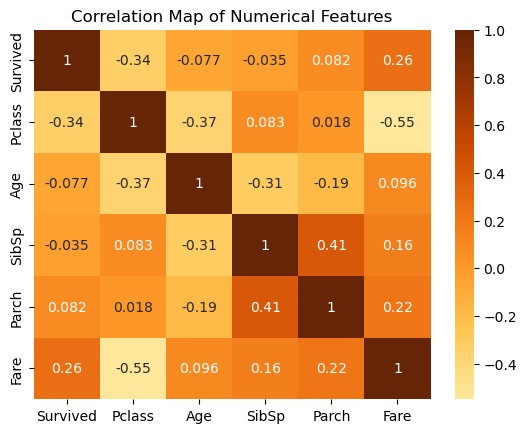

In [11]:
sns.heatmap(train.corr(), annot = True, cmap = 'YlOrBr', center = 0)
plt.title('Correlation Map of Numerical Features')
plt.show()

### Data Preprocessing

In [12]:
# Checking Missing Values

train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
train.drop(columns = ['Name','Cabin','Ticket'], inplace = True)

In [14]:
# fill the missing values

train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [15]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
# Label Encoding

cols = ['Sex','Embarked']

le = LabelEncoder()

for x in cols:
    train[x] = le.fit_transform(train[x])

In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [18]:
# Outlier Detection & Handling

Q3 = train['Age'].quantile(0.75)
Q1 = train['Age'].quantile(0.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

data = train[(train['Age'] > lower) & (train['Age'] < upper)]

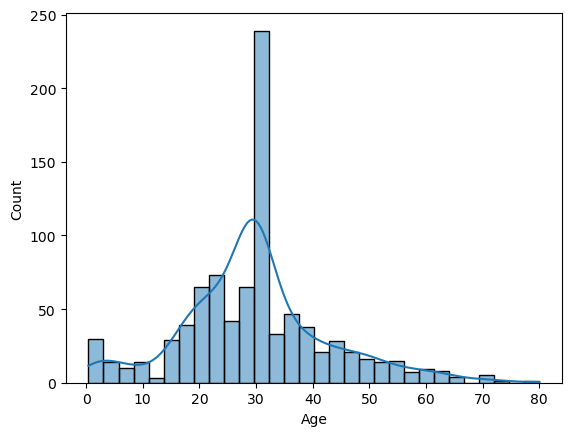

In [19]:
sns.histplot(data = train, x = 'Age', kde = True)
plt.show()

In [20]:
Q3 = train['Fare'].quantile(0.75)
Q1 = train['Fare'].quantile(0.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

data = train[(train['Fare'] > lower) & (train['Fare'] < upper)]

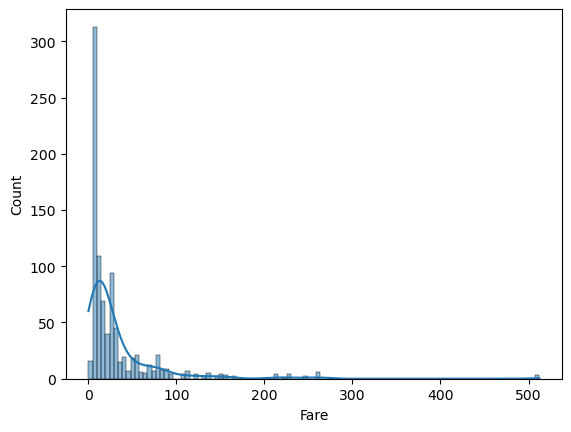

In [21]:
sns.histplot(data = train, x = 'Fare', kde = True)
plt.show()

In [22]:
# Feature Scaling

std_scal = StandardScaler()
cols = ['Age','Fare']

for col in cols:
    train[col] = std_scal.fit_transform(train[col].values.reshape(-1,1))

In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592481,1,0,-0.502445,2
1,1,1,0,0.638789,1,0,0.786845,0
2,1,3,0,-0.284663,0,0,-0.488854,2
3,1,1,0,0.407926,1,0,0.420730,2
4,0,3,1,0.407926,0,0,-0.486337,2


In [24]:
# split train and test data

X = train.drop('Survived', axis = 1)
Y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

### Model Building

In [25]:
# Logistic Regression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

In [26]:
# Naïve Bayes

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_nb = gnb.predict(X_test)

In [27]:
#  KNN

knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [28]:
# SVM

classifier = svm.SVC(kernel = 'rbf')

classifier.fit(X_train, y_train)

y_pred_svm = classifier.predict(X_test)

### Model Evaluation

In [29]:
print("Confusion Matrix on test data using Logistic Regression : \n", confusion_matrix(y_test, y_pred_lr))
print(" \nAccuracy Score on test data using Logistic Regression :", accuracy_score(y_test, y_pred_lr))

Confusion Matrix on test data using Logistic Regression : 
 [[90 15]
 [19 55]]
 
Accuracy Score on test data using Logistic Regression : 0.8100558659217877


In [30]:
print("Confusion Matrix on test data using Naive Bayes : \n", confusion_matrix(y_test, y_pred_nb))
print("\nAccuracy Score on test data using Naive Bayes :", accuracy_score(y_test, y_pred_nb))

Confusion Matrix on test data using Naive Bayes : 
 [[82 23]
 [17 57]]

Accuracy Score on test data using Naive Bayes : 0.776536312849162


In [31]:
print("Confusion Matrix on test data using Knn : \n", confusion_matrix(y_test, y_pred_knn))
print("\nK Nearest neighbors on test data using Knn : ", accuracy_score(y_test, y_pred_knn))

Confusion Matrix on test data using Knn : 
 [[90 15]
 [21 53]]

K Nearest neighbors on test data using Knn :  0.7988826815642458


In [32]:
print("Confusion Matrix on test data using Svm : \n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy Score on test data using SVM :", accuracy_score(y_test, y_pred_svm))

Confusion Matrix on test data using Svm : 
 [[92 13]
 [20 54]]
Accuracy Score on test data using SVM : 0.8156424581005587


### Result

In [33]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'KNN', 'Support Vector Machines'],
    
    'acc_Score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_nb), 
                  accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm)]})

result_df = results.sort_values(by = 'acc_Score', ascending = False)

result_df = result_df.set_index('acc_Score')

result_df.head()

,Model
acc_Score,
0.815642,Support Vector Machines
0.810056,Logistic Regression
0.798883,KNN
0.776536,Naive Bayes
